In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [ ]:
wines = pd.read_csv('wines.csv')

In [ ]:
wines

,Unnamed: 0,wine_id,old,alcohol,color,reviewers,residual_sugar,acidity,vol_acidity
0,0,279,31.0,11.2,rose,0.0,NaN,5.966940,5.335072
1,1,230,21.0,11.3,red,0.0,NaN,4.753507,4.262728
2,2,856,33.0,9.0,white,0.0,16.532021,6.046483,5.395146
3,3,128,20.0,9.8,rose,0.0,NaN,4.572940,4.034216
4,4,918,33.0,11.3,red,0.0,14.605029,4.762562,3.797824
...,...,...,...,...,...,...,...,...,...
1009,1009,55,20.0,12.6,red,0.0,NaN,6.502504,6.128093
1010,1010,395,25.0,9.8,rose,0.0,2.806606,4.995714,4.830099
1011,1011,888,27.0,10.9,rose,0.0,NaN,5.360313,4.149717
1012,1012,767,31.0,13.2,rose,0.0,NaN,6.250317,5.502109


In [ ]:
## Eliminam coloana datorata formatului .csv
wines.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
wines

,wine_id,old,alcohol,color,reviewers,residual_sugar,acidity,vol_acidity
0,279,31.0,11.2,rose,0.0,NaN,5.966940,5.335072
1,230,21.0,11.3,red,0.0,NaN,4.753507,4.262728
2,856,33.0,9.0,white,0.0,16.532021,6.046483,5.395146
3,128,20.0,9.8,rose,0.0,NaN,4.572940,4.034216
4,918,33.0,11.3,red,0.0,14.605029,4.762562,3.797824
...,...,...,...,...,...,...,...,...
1009,55,20.0,12.6,red,0.0,NaN,6.502504,6.128093
1010,395,25.0,9.8,rose,0.0,2.806606,4.995714,4.830099
1011,888,27.0,10.9,rose,0.0,NaN,5.360313,4.149717
1012,767,31.0,13.2,rose,0.0,NaN,6.250317,5.502109


## Check dataframe structure

In [ ]:
## Verificam caate valori nule sunt pe fiecare coloana
wines.isna().sum()

,0
wine_id,0
old,8
alcohol,12
color,67
reviewers,10
residual_sugar,654
acidity,10
vol_acidity,10


In [ ]:
## Alternativ putem folosi info() si describe()
wines.info()
## Describe e doar pe valori numerice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wine_id         1014 non-null   int64  
 1   old             1006 non-null   float64
 2   alcohol         1002 non-null   float64
 3   color           947 non-null    object 
 4   reviewers       1004 non-null   float64
 5   residual_sugar  360 non-null    float64
 6   acidity         1004 non-null   float64
 7   vol_acidity     1004 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 63.5+ KB


## Elimnate unique identifiers columns

In [ ]:
## Se elimina deoarece nu contribuie la invatare sau la relatiile intre variabile (sunt semnificate ca relatie de tip 1:1 in setul de date si nu se invata nici un aspect relevant)
## Valorile respective ar putea fi interpretate gresit de catre model (de exemplu un id mai mare sa aiba o valoare mai mare ca semnificatie)
## Pot ascunde duplicate
## Introduc zgomot in model si diminueaza performata acestuia (influenteaza ponderile)
wines.drop(columns=['wine_id'], inplace=True)

In [ ]:
wines

,old,alcohol,color,reviewers,residual_sugar,acidity,vol_acidity
0,31.0,11.2,rose,0.0,NaN,5.966940,5.335072
1,21.0,11.3,red,0.0,NaN,4.753507,4.262728
2,33.0,9.0,white,0.0,16.532021,6.046483,5.395146
3,20.0,9.8,rose,0.0,NaN,4.572940,4.034216
4,33.0,11.3,red,0.0,14.605029,4.762562,3.797824
...,...,...,...,...,...,...,...
1009,20.0,12.6,red,0.0,NaN,6.502504,6.128093
1010,25.0,9.8,rose,0.0,2.806606,4.995714,4.830099
1011,27.0,10.9,rose,0.0,NaN,5.360313,4.149717
1012,31.0,13.2,rose,0.0,NaN,6.250317,5.502109


## Eliminate duplicate rows

In [ ]:
## Pot influenta rezultatele modelului intr-un mod negativ
## Dacă un rând este duplicat, acesta influențează metricele statistice cum ar fi media, mediana, distribuția, și deviația standard.
wines.drop_duplicates(keep='last', inplace=True)

In [ ]:
wines ## Grija la valorile unice, fie sunt eliminate initial, fie se foloseste un subset pentru a elimina duplicatele in cazul in care cheia unica este folosita mai departe in analiza
## Creeam un subset care este o lista a coloanelor fara identificatori unici
## subset = wines.loc[:, ~wines.columns.isin(['wine_id'])].columns
## wines.drop_duplicates(subset=subset, keep='last', inplace=True)

,old,alcohol,color,reviewers,residual_sugar,acidity,vol_acidity
0,31.0,11.2,rose,0.0,NaN,5.966940,5.335072
1,21.0,11.3,red,0.0,NaN,4.753507,4.262728
2,33.0,9.0,white,0.0,16.532021,6.046483,5.395146
3,20.0,9.8,rose,0.0,NaN,4.572940,4.034216
4,33.0,11.3,red,0.0,14.605029,4.762562,3.797824
...,...,...,...,...,...,...,...
1009,20.0,12.6,red,0.0,NaN,6.502504,6.128093
1010,25.0,9.8,rose,0.0,2.806606,4.995714,4.830099
1011,27.0,10.9,rose,0.0,NaN,5.360313,4.149717
1012,31.0,13.2,rose,0.0,NaN,6.250317,5.502109


In [ ]:
wines.isna().sum()

,0
old,4
alcohol,8
color,65
reviewers,5
residual_sugar,650
acidity,7
vol_acidity,7


## Eliminate irrelevant rows

In [ ]:
## Functie eliminare randuri cu multe null-uri

## Alegem un prag procentual
THRESHOLD = 0.3

def erase_low_information_rows(dataset: pd.DataFrame, percentage_threshold: float):
  ## Aflam lungimea randului
  len_row = dataset.shape[1]

  ## Calculam numarul de null-uri (pragul dupa care vom face si filtrarea)
  no_nulls = int(len_row * percentage_threshold)

  ## Se afla numarul de null-uri de pe fiecare rand
  no_nulls_rows = dataset.isna().sum(axis=1)

  print(no_nulls_rows)


  ## Se filtreaza randurile pe baza pragului
  rows_to_keep = no_nulls_rows <= no_nulls

  print(rows_to_keep)

  ## Se aplica masca peste dataframe
  dataset = dataset[rows_to_keep]

  return dataset


wines = erase_low_information_rows(dataset=wines, percentage_threshold = THRESHOLD)

0       1
1       1
2       0
3       1
4       0
       ..
1009    1
1010    0
1011    1
1012    1
1013    1
Length: 1007, dtype: int64
0       True
1       True
2       True
3       True
4       True
        ... 
1009    True
1010    True
1011    True
1012    True
1013    True
Length: 1007, dtype: bool


In [ ]:
wines

,old,alcohol,color,reviewers,residual_sugar,acidity,vol_acidity
0,31.0,11.2,rose,0.0,NaN,5.966940,5.335072
1,21.0,11.3,red,0.0,NaN,4.753507,4.262728
2,33.0,9.0,white,0.0,16.532021,6.046483,5.395146
3,20.0,9.8,rose,0.0,NaN,4.572940,4.034216
4,33.0,11.3,red,0.0,14.605029,4.762562,3.797824
...,...,...,...,...,...,...,...
1009,20.0,12.6,red,0.0,NaN,6.502504,6.128093
1010,25.0,9.8,rose,0.0,2.806606,4.995714,4.830099
1011,27.0,10.9,rose,0.0,NaN,5.360313,4.149717
1012,31.0,13.2,rose,0.0,NaN,6.250317,5.502109


In [ ]:
wines.isna().sum()

,0
old,0
alcohol,4
color,62
reviewers,1
residual_sugar,644
acidity,2
vol_acidity,2


## Eliminate columns with a large number of nulls

In [ ]:
## Ne setam un prag procentual
COL_THRESHOLD = 0.3

In [ ]:
def eliminate_null_columns(dataset: pd.DataFrame, threshold: float):
  ## Aflam lungimea coloanei
  lc = dataset.shape[0]

  ## Alflam numarul de null-uri
  no_nulls = int(lc * threshold)

  ## Selectam doar coloanele care au un numar mai mic de null-uri decat pragul procentual

  dataset = dataset.loc[:, dataset.isnull().sum() < no_nulls]

  return dataset

wines = eliminate_null_columns(wines, COL_THRESHOLD)

In [ ]:
wines

,old,alcohol,color,reviewers,acidity,vol_acidity
0,31.0,11.2,rose,0.0,5.966940,5.335072
1,21.0,11.3,red,0.0,4.753507,4.262728
2,33.0,9.0,white,0.0,6.046483,5.395146
3,20.0,9.8,rose,0.0,4.572940,4.034216
4,33.0,11.3,red,0.0,4.762562,3.797824
...,...,...,...,...,...,...
1009,20.0,12.6,red,0.0,6.502504,6.128093
1010,25.0,9.8,rose,0.0,4.995714,4.830099
1011,27.0,10.9,rose,0.0,5.360313,4.149717
1012,31.0,13.2,rose,0.0,6.250317,5.502109


## Eliminate low variance columns

In [ ]:
## O variabila cu o varianta mica inseamna ca valorile sale sunt aproape identice pentru toate inregistrarile
## Nu ajuta la diferentiarea intre clase (clasificare) sau nu explica variabilitatea target-ului (regresie)
## Eliminarea acestora ajuta modelul sa generalizeze mai bine datele

In [ ]:
## Alegen un prag de varianta inferioara
VAR_THRESH = 0.05

def eliminate_low_variance(dataset: pd.DataFrame, threshold: float):
  ## Se iau in considerare doar coloanele numerice si calculam varianta acestor coloane
  variance = dataset.drop(columns=['color']).var()
  print(variance)

  ## Extragem coloanele cu o varianta mica
  lv_cols = dataset.drop(columns=['color']).loc[:, variance < threshold].columns
  print(lv_cols)

  ## Eliminare coloane cu varianta mica
  dataset = dataset.drop(columns=lv_cols)

  return dataset


wines = eliminate_low_variance(wines, VAR_THRESH)




old            18.895553
alcohol         0.978465
reviewers       0.045452
acidity         1.200763
vol_acidity     1.211707
dtype: float64
Index(['reviewers'], dtype='object')


In [ ]:
wines

,old,alcohol,color,acidity,vol_acidity
0,31.0,11.2,rose,5.966940,5.335072
1,21.0,11.3,red,4.753507,4.262728
2,33.0,9.0,white,6.046483,5.395146
3,20.0,9.8,rose,4.572940,4.034216
4,33.0,11.3,red,4.762562,3.797824
...,...,...,...,...,...
1009,20.0,12.6,red,6.502504,6.128093
1010,25.0,9.8,rose,4.995714,4.830099
1011,27.0,10.9,rose,5.360313,4.149717
1012,31.0,13.2,rose,6.250317,5.502109


## Replace null values

In [ ]:
wines.isna().sum()

,0
old,0
alcohol,4
color,62
acidity,2
vol_acidity,2


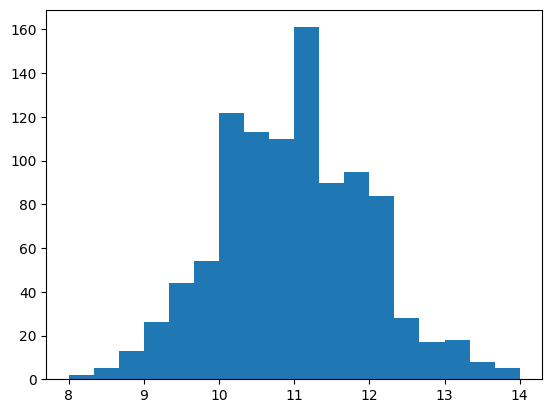

In [ ]:
plt.hist(x=wines.alcohol, bins=18)
plt.show()
## Distributie normala

In [ ]:
## 2 variante, fie se inlocuiesc valorile nule la nivel de valoare mediana sau medie pe intreg dataset, fie in raport cu o valoare categorica din setul nostru de date
wines[wines.alcohol.isna()]

,old,alcohol,color,acidity,vol_acidity
28,31.0,NaN,rose,7.500711,6.481379
272,30.0,NaN,red,8.018796,7.280847
559,28.0,NaN,rose,4.856665,4.112499
612,24.0,NaN,red,6.661426,4.956283


In [ ]:
wines[(wines.alcohol.isna()) & (wines.color == 'rose')]

,old,alcohol,color,acidity,vol_acidity
28,31.0,NaN,rose,7.500711,6.481379
559,28.0,NaN,rose,4.856665,4.112499


In [ ]:
wines.alcohol.mean().round(2)

10.98

In [ ]:
wines[(wines.alcohol.isna()) & (wines.color == 'rose')].index

Index([28, 559], dtype='int64')

In [ ]:
idxs = wines[(wines.alcohol.isna()) & (wines.color == 'rose')].index

In [ ]:
wines.loc[idxs, 'alcohol'] = wines.alcohol.mean().round(2)

In [ ]:
wines.loc[idxs, 'alcohol']

,alcohol
28,10.98
559,10.98


In [ ]:
## Varianta cu media doar pe coloana categorica
means = wines.groupby('color')['alcohol'].mean()

In [ ]:
means

,alcohol
color,
red,11.007902
rose,11.004345
white,10.941627


In [ ]:
def replace_null_with_mean(row, means):
  if pd.isnull(row['alcohol']):
    return means[row['color']]
  else:
    return row['alcohol']

In [ ]:
wines.alcohol = wines.apply(lambda row : replace_null_with_mean(row, means), axis=1)

In [ ]:
wines

,old,alcohol,color,acidity,vol_acidity
0,31.0,11.2,rose,5.966940,5.335072
1,21.0,11.3,red,4.753507,4.262728
2,33.0,9.0,white,6.046483,5.395146
3,20.0,9.8,rose,4.572940,4.034216
4,33.0,11.3,red,4.762562,3.797824
...,...,...,...,...,...
1009,20.0,12.6,red,6.502504,6.128093
1010,25.0,9.8,rose,4.995714,4.830099
1011,27.0,10.9,rose,5.360313,4.149717
1012,31.0,13.2,rose,6.250317,5.502109


In [ ]:
wines.isna().sum()

,0
old,0
alcohol,0
color,62
acidity,2
vol_acidity,2


In [ ]:
wines.loc[272]

,272
old,30.0
alcohol,11.007902
color,red
acidity,8.018796
vol_acidity,7.280847


(array([ 54., 213., 257., 197., 119.,  71.,  45.,  20.,   8.,   4.,   4.,
          3.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 3.8       ,  4.37777778,  4.95555556,  5.53333333,  6.11111111,
         6.68888889,  7.26666667,  7.84444444,  8.42222222,  9.        ,
         9.57777778, 10.15555556, 10.73333333, 11.31111111, 11.88888889,
        12.46666667, 13.04444444, 13.62222222, 14.2       ]),
 <BarContainer object of 18 artists>)

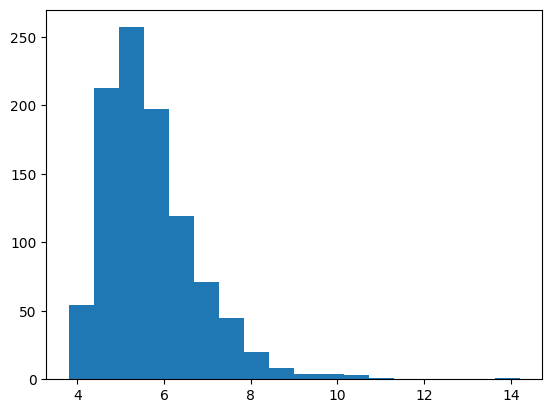

In [ ]:
## Inlocuirea cu valoarea mediana este analog cu cea bazata pe inlocuirea cu valoare medie, doar schimbam mean in median
plt.hist(x=wines.acidity, bins=18)

In [ ]:
wines.acidity.mean()

5.692217470071328

In [ ]:
wines.acidity.median()

5.482101024925552

In [ ]:
medians = wines.groupby('color')['acidity'].median()
def replace_null_with_median(row, medians):
  if pd.isnull(row['acidity']):
    return medians[row['color']]
  else:
    return row['acidity']

In [ ]:
wines.acidity = wines.apply(lambda row : replace_null_with_median(row, medians), axis=1)

In [ ]:
medians = wines.groupby('color')['vol_acidity'].median()
def replace_null_with_median(row, medians):
  if pd.isnull(row['vol_acidity']):
    return medians[row['color']]
  else:
    return row['vol_acidity']

In [ ]:
wines.vol_acidity = wines.apply(lambda row : replace_null_with_median(row, medians), axis=1)

In [ ]:
## Puteam inlocui cu mediana si in cazul in care distributia era normala?
## Este important cand imputam valori sa pastram distributia datelor noastre

## Tratarea valorilor categorice nule

In [ ]:
wines.isna().sum()

,0
old,0
alcohol,0
color,62
acidity,0
vol_acidity,0


In [ ]:
wines.color = wines.color.fillna(value='Unknown')

In [ ]:
wines.isna().sum()

,0
old,0
alcohol,0
color,0
acidity,0
vol_acidity,0


In [ ]:
wines.color.value_counts()

,count
color,
red,369
rose,359
white,209
Unknown,62


* O alta varianta ar putea fi imputarea lor cu o valoare aleasa in urma gruparii celorlalte variabile (prin folosirea unui knn)
* Reprezentam in spatiu toate punctele pentru care color este cunoscut
* Se calculeaza centrul fiecarui astfel de grup (valoare medie)
* Se calculeaza distanta de la fiecare astfel de centru catre fiecare valoare pentru care color este necunoscut
* Distanta cea mai mica inseamna ca punctul apartine acelui grup

* O alta modalitate este aceea de a inlocui cu valoarea care apare cel mai frecvent in categoria respectiva
* Acesta modalitate nu este de obicei recoandata pentru ca schimbarile respective nu reflecta diversitatea reala a datelor
* Deasemenea se si pot elimina valorile respective, insa doar daca sunt in numar foarte mic

## Eliminarea valorilor puternic corelate

In [ ]:
## Ne setam un prag pentru indicele de corelatie
CORR_THRESH = 0.85

In [ ]:
## Corelatia se calculeaza doar pe valorile numerice
wines

,old,alcohol,color,acidity,vol_acidity
0,31.0,11.2,rose,5.966940,5.335072
1,21.0,11.3,red,4.753507,4.262728
2,33.0,9.0,white,6.046483,5.395146
3,20.0,9.8,rose,4.572940,4.034216
4,33.0,11.3,red,4.762562,3.797824
...,...,...,...,...,...
1009,20.0,12.6,red,6.502504,6.128093
1010,25.0,9.8,rose,4.995714,4.830099
1011,27.0,10.9,rose,5.360313,4.149717
1012,31.0,13.2,rose,6.250317,5.502109


In [ ]:
wines.drop(columns=['color']).corr().abs()

,old,alcohol,acidity,vol_acidity
old,1.000000,0.020441,0.001835,0.015580
alcohol,0.020441,1.000000,0.012224,0.038612
acidity,0.001835,0.012224,1.000000,0.884725
vol_acidity,0.015580,0.038612,0.884725,1.000000


In [ ]:
corr_matrix = wines.drop(columns=['color']).corr().abs()

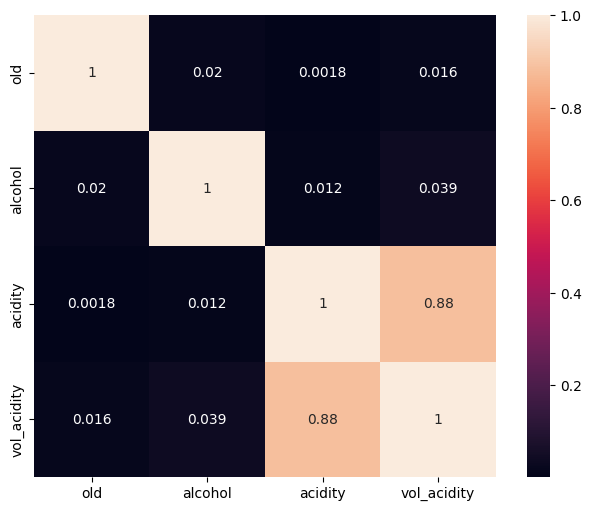

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, square=True)
plt.show()

In [ ]:
## Creez o matrice superior triunghiulara fara diagonala principala, o setez ca bool si aplic ca si masca peste matricea de corelatie
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

In [ ]:
for columns in upper.columns:
  col
  if any(upper[columns] > CORR_THRESH):
    print(columns)

vol_acidity


In [ ]:
cols_to_drop = [column for column in upper.columns if any(upper[column] > CORR_THRESH)]

In [ ]:
wines.drop(columns=cols_to_drop, inplace=True)

In [ ]:
wines

,old,alcohol,color,acidity
0,31.0,11.2,rose,5.966940
1,21.0,11.3,red,4.753507
2,33.0,9.0,white,6.046483
3,20.0,9.8,rose,4.572940
4,33.0,11.3,red,4.762562
...,...,...,...,...
1009,20.0,12.6,red,6.502504
1010,25.0,9.8,rose,4.995714
1011,27.0,10.9,rose,5.360313
1012,31.0,13.2,rose,6.250317
